In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
df_index=pd.read_excel('MultiLinear.xlsx')

In [15]:
df_index.head()

,Unnamed: 0,year,month,intrest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [16]:
# drop unnecessary column
df_index.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [17]:
df_index.head()

,intrest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [18]:
# check tthe null values
df_index.isnull().sum()

intrest_rate         0
unemployment_rate    0
index_price          0
dtype: int64

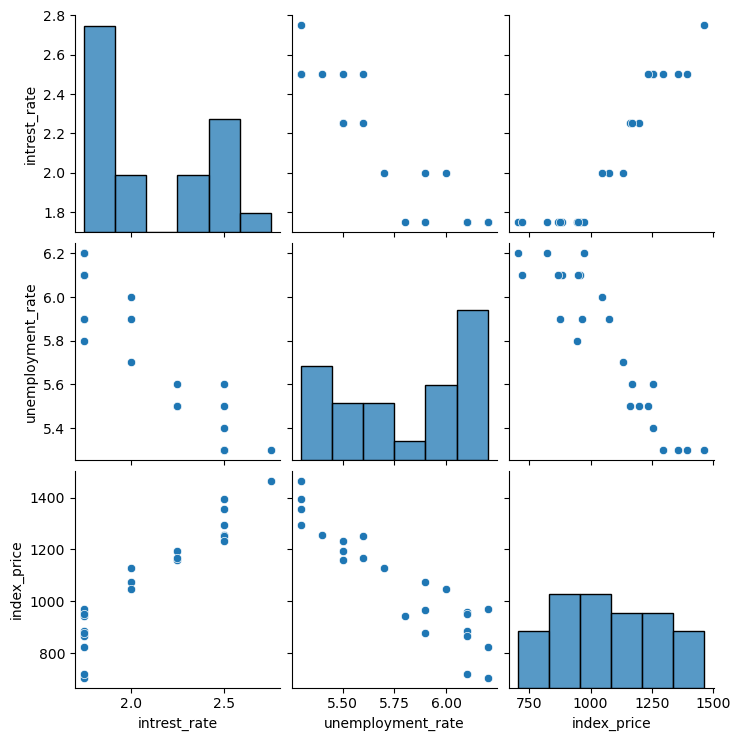

In [19]:
# lets do some visualization
sns.pairplot(df_index)

In [20]:
df_index.corr()

,intrest_rate,unemployment_rate,index_price
intrest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment rate')

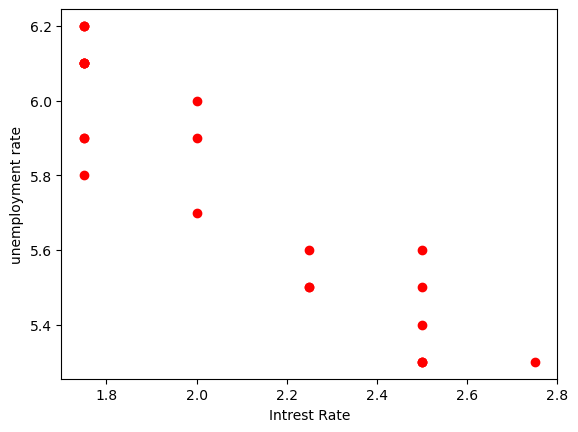

In [21]:
# visualize the datapoint more closely

plt.scatter(df_index['intrest_rate'],df_index['unemployment_rate'],color='r')
plt.xlabel("Intrest Rate")
plt.ylabel("unemployment rate")

In [22]:
X=df_index.iloc[:,:-1]
y=df_index.iloc[:,-1]

In [23]:
X.head()

,intrest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [24]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [25]:
sns.regplot(df_index['intrest_rate'],df_index['index_price'])

TypeError: regplot() takes from 0 to 1 positional arguments but 2 were given

<Axes: xlabel='intrest_rate', ylabel='index_price'>

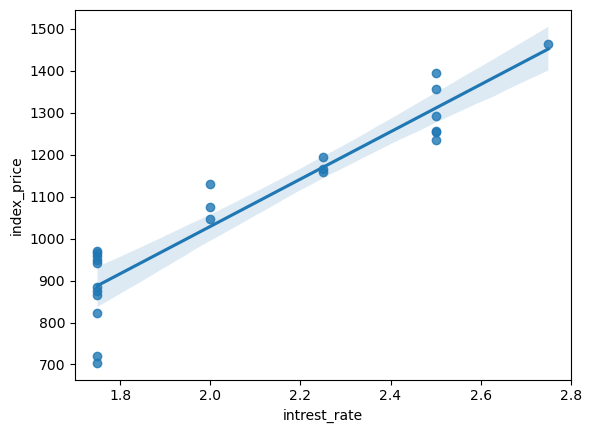

In [26]:
sns.regplot(x=df_index['intrest_rate'], y=df_index['index_price'])

In [27]:
import seaborn as sns

<Axes: xlabel='intrest_rate', ylabel='unemployment_rate'>

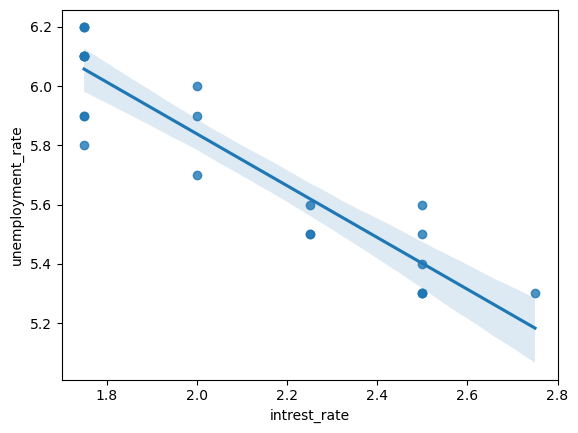

In [28]:
sns.regplot(x=df_index['intrest_rate'], y=df_index['unemployment_rate'])


In [29]:
# standard scalar
from sklearn.preprocessing import StandardScaler

In [30]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
x_test=scaler.fit_transform(X_test)

In [31]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [32]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [43]:
# cross validation
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',
                                cv=3)

In [44]:
np.mean(validation_score)


-5914.828180162388

In [45]:
## prediction
regression.fit(X_train, y_train)  # Train the model

y_pred=regression.predict(X_test)

C:\Users\piyus\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [46]:
y_pred

array([612.64375972, 487.12736973, 680.03156939, 498.75308579,
       544.07270669, 601.01804366])

In [47]:
# perormance matrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [48]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

316313.152401458
549.3922441707886
562.4172404909526


In [49]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)
# display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

-8.395998348460047


-14.659997247433411

# Assumptions

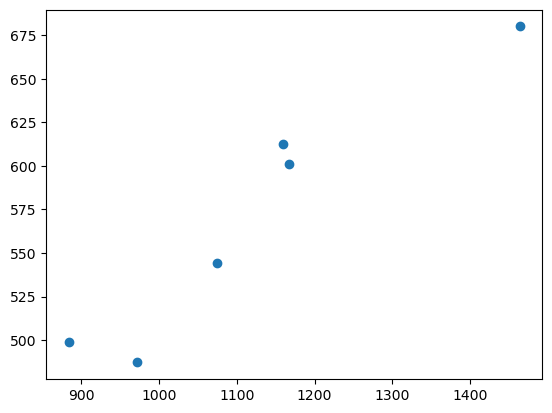

In [50]:
plt.scatter(y_test,y_pred)

In [51]:
residuals=y_test-y_pred
print(residuals)

8     546.356240
16    483.872630
0     783.968431
18    385.246914
11    530.927293
9     565.981956
Name: index_price, dtype: float64


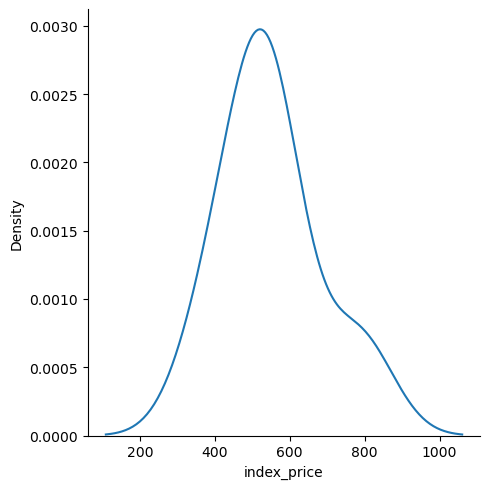

In [53]:
# plot the residuals
sns.displot(residuals,kind='kde')


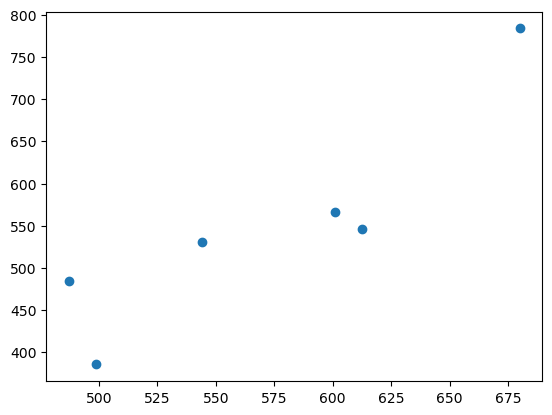

In [54]:
# create a scatter plot respect to prediction and ressiduals
plt.scatter(y_pred,residuals)

In [60]:
# OLS Linear regression
import statsmodels.api as sm

In [61]:
model = sm.OLS(y_train,X_train).fit()
prediction=model.predict(X_test)
print(prediction)

8    -440.800685
16   -566.317075
0    -373.412875
18   -554.691359
11   -509.371738
9    -452.426401
dtype: float64


In [62]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Wed, 19 Mar 2025   Prob (F-statistic):                       0.754
Time:                        02:07:17   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\piyus\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


In [63]:
print(regression.coef_)

[  88.27275507 -116.25716066]
